In [ ]:
'''
Google Data Analytics Case Study

Cyclistic, a bike-share company in Chicago, is operating a bike sharing program that features more than 5,800 bicycles and 600 docking stations. 
The bikes can be unlocked from one station and returned to any other station in the system anytime.

Cyclistic's marketing strategy relied on building general awareness and appealing to broad consumer segments. 
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. 
Customers who purchase single-ride or full-day passes are referred to as casual riders. 
Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day. 
Customers who purchase annual memberships are Cyclistic members. 
The director of marketing in Cyclistic believes the company's future success depends on maximizing the number of annual memberships. 

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

'''

In [ ]:
'''
Data Cleaning

Steps
1. Import and combine 12 files for each month representing cyclistic bike rentals in 2022
2. Remove missing data
3. Fix data types for analysis
4. Remove duplicates of primary key 'ride_id'
5. Filter data for 'ride_length' outliers to improve mean and skewness of data
6. Export to csv to create dashboard on tableau
'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
# Merge data using concat because columns position across excel files are the same
path = r'C:/Users/Chris/OneDrive/Desktop/Python Projects/cyclistic data'

dataframes = []
for i in range(12):
    file_path = path + f'/{i+1}.csv'
    df = pd.read_csv(file_path)
    dataframes.append(df)

cyclistic = pd.concat(dataframes, ignore_index = True)
print(cyclistic)

                  ride_id  rideable_type           started_at  \
0        C2F7DD78E82EC875  electric_bike  2022-01-13 11:59:47   
1        A6CF8980A652D272  electric_bike  2022-01-10 08:41:56   
2        BD0F91DFF741C66D   classic_bike  2022-01-25 04:53:40   
3        CBB80ED419105406   classic_bike  2022-01-04 00:18:04   
4        DDC963BFDDA51EEA   classic_bike  2022-01-20 01:31:10   
...                   ...            ...                  ...   
5667712  43ABEE85B6E15DCA   classic_bike  2022-12-05 06:51:04   
5667713  F041C89A3D1F0270  electric_bike  2022-12-14 17:06:28   
5667714  A2BECB88430BE156   classic_bike  2022-12-08 16:27:47   
5667715  37B392960E566F58   classic_bike  2022-12-28 09:37:38   
5667716  2DD1587210BA45AE   classic_bike  2022-12-09 00:27:25   

                    ended_at             start_station_name start_station_id  \
0        2022-01-13 12:02:44       Glenwood Ave & Touhy Ave              525   
1        2022-01-10 08:46:17       Glenwood Ave & Touhy Ave

In [3]:
# Check if merge was successful
print('Starting date:', cyclistic['started_at'].min())
print('Ending date:', cyclistic['started_at'].max()) # Merge was successful. Do note we will consider 2022 data based on point of sale/last datetime of 'started_at'

Starting date: 2022-01-01 00:00:05
Ending date: 2022-12-31 23:59:26


In [4]:
# Remove duplicated primary key 'ride_id'
cyclistic = cyclistic.drop_duplicates(subset = ['ride_id'])
print(cyclistic.count())

ride_id               5667717
rideable_type         5667717
started_at            5667717
ended_at              5667717
start_station_name    4834653
start_station_id      4834653
end_station_name      4774975
end_station_id        4774975
start_lat             5667717
start_lng             5667717
end_lat               5661859
end_lng               5661859
member_casual         5667717
dtype: int64


In [5]:
# Analysing if missing data present
print('Total count', '\n', cyclistic.count(), '\n')
print('Count missing data', '\n', cyclistic.isna().sum(), '\n')

Total count 
 ride_id               5667717
rideable_type         5667717
started_at            5667717
ended_at              5667717
start_station_name    4834653
start_station_id      4834653
end_station_name      4774975
end_station_id        4774975
start_lat             5667717
start_lng             5667717
end_lat               5661859
end_lng               5661859
member_casual         5667717
dtype: int64 

Count missing data 
 ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64 



In [6]:
# Case example where start station is Nan
cyclistic[cyclistic['start_station_name'].isna()].head(5) # May run into issues i.e. trends in station location or popular sites because they are unrecorded

# As we are finding trends in relational database to engage marketing strategies, clean data will be important to achieve a confident analysis. 
# Thus the decision to drop Nan values in the database

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
256,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual
979,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,Ashland Ave & Grace St,13319,41.95,-87.65,41.950687,-87.668700,member
980,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,Ashland Ave & Grace St,13319,41.92,-87.69,41.950687,-87.668700,member
1079,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member
1080,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member


In [7]:
cyclistic.dropna(inplace = True)
print(cyclistic.count())

ride_id               4369360
rideable_type         4369360
started_at            4369360
ended_at              4369360
start_station_name    4369360
start_station_id      4369360
end_station_name      4369360
end_station_id        4369360
start_lat             4369360
start_lng             4369360
end_lat               4369360
end_lng               4369360
member_casual         4369360
dtype: int64


In [8]:
# Fixing data types 
print('Before', '\n', cyclistic.dtypes, '\n')
cyclistic['started_at'] = cyclistic['started_at'].astype('datetime64[ns]')
cyclistic['ended_at'] = cyclistic['ended_at'].astype('datetime64[ns]')
cyclistic['member_casual'] = pd.Categorical(cyclistic['member_casual'], categories = ['member', 'casual'])
print('After', '\n', cyclistic.dtypes)

Before 
 ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object 

After 
 ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
dtype: object


In [9]:
# Add new column ride_length to find trends in our data
cyclistic['ride_length'] = cyclistic['ended_at'] - cyclistic['started_at']
print('min ride length:', cyclistic['ride_length'].min())
print('max ride length:', cyclistic['ride_length'].max())

min ride length: -1 days +21:11:18
max ride length: 23 days 20:34:04


In [10]:
# Remove negative ride length
cyclistic = cyclistic[~(cyclistic['ride_length'] < pd.Timedelta('0 days 00:00:00'))]
print('min ride length:', cyclistic['ride_length'].min())
print('max ride length:', cyclistic['ride_length'].max())

min ride length: 0 days 00:00:00
max ride length: 23 days 20:34:04


In [11]:
cyclistic['ride_length'].describe()
# From this data insight we can see that although ride length has an average of 17:05 minutes, our max time is 23 days 20:34:04 indicating that our data is right skewed

count                      4369291
mean     0 days 00:17:05.750345765
std      0 days 00:47:52.035890902
min                0 days 00:00:00
25%                0 days 00:06:03
50%                0 days 00:10:36
75%                0 days 00:19:01
max               23 days 20:34:04
Name: ride_length, dtype: object

In [12]:
# Add new total seconds to remove outliers; standardise data to integer value
cyclistic['total_seconds'] = cyclistic['ride_length'].dt.total_seconds()
cyclistic['total_seconds'] = cyclistic['total_seconds'].astype('int64')
print(cyclistic.head(5))

            ride_id  rideable_type          started_at            ended_at  \
0  C2F7DD78E82EC875  electric_bike 2022-01-13 11:59:47 2022-01-13 12:02:44   
1  A6CF8980A652D272  electric_bike 2022-01-10 08:41:56 2022-01-10 08:46:17   
2  BD0F91DFF741C66D   classic_bike 2022-01-25 04:53:40 2022-01-25 04:58:01   
3  CBB80ED419105406   classic_bike 2022-01-04 00:18:04 2022-01-04 00:33:00   
4  DDC963BFDDA51EEA   classic_bike 2022-01-20 01:31:10 2022-01-20 01:37:12   

              start_station_name start_station_id  \
0       Glenwood Ave & Touhy Ave              525   
1       Glenwood Ave & Touhy Ave              525   
2  Sheffield Ave & Fullerton Ave     TA1306000016   
3       Clark St & Bryn Mawr Ave     KA1504000151   
4    Michigan Ave & Jackson Blvd     TA1309000002   

                end_station_name end_station_id  start_lat  start_lng  \
0           Clark St & Touhy Ave         RP-007  42.012800 -87.665906   
1           Clark St & Touhy Ave         RP-007  42.012763 -87.665

In [13]:
cyclistic['day'] = cyclistic['started_at'].dt.day_name()
print(cyclistic.head())

            ride_id  rideable_type          started_at            ended_at  \
0  C2F7DD78E82EC875  electric_bike 2022-01-13 11:59:47 2022-01-13 12:02:44   
1  A6CF8980A652D272  electric_bike 2022-01-10 08:41:56 2022-01-10 08:46:17   
2  BD0F91DFF741C66D   classic_bike 2022-01-25 04:53:40 2022-01-25 04:58:01   
3  CBB80ED419105406   classic_bike 2022-01-04 00:18:04 2022-01-04 00:33:00   
4  DDC963BFDDA51EEA   classic_bike 2022-01-20 01:31:10 2022-01-20 01:37:12   

              start_station_name start_station_id  \
0       Glenwood Ave & Touhy Ave              525   
1       Glenwood Ave & Touhy Ave              525   
2  Sheffield Ave & Fullerton Ave     TA1306000016   
3       Clark St & Bryn Mawr Ave     KA1504000151   
4    Michigan Ave & Jackson Blvd     TA1309000002   

                end_station_name end_station_id  start_lat  start_lng  \
0           Clark St & Touhy Ave         RP-007  42.012800 -87.665906   
1           Clark St & Touhy Ave         RP-007  42.012763 -87.665

In [14]:
# Because the mean is smaller relative to the inter quantile range (IQR method), we use a percentile method to remove outliers in the data
upper_limit = cyclistic['total_seconds'].quantile(0.975)
lower_limit = cyclistic['total_seconds'].quantile(0.025)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 4172.0
lower limit: 96.0


In [15]:
df = cyclistic[(cyclistic['total_seconds'] <= upper_limit) & (cyclistic['total_seconds'] >= lower_limit)]
print(df) # from 4,369,360 to 4,151,230 captures 95% of our data

                  ride_id  rideable_type          started_at  \
0        C2F7DD78E82EC875  electric_bike 2022-01-13 11:59:47   
1        A6CF8980A652D272  electric_bike 2022-01-10 08:41:56   
2        BD0F91DFF741C66D   classic_bike 2022-01-25 04:53:40   
3        CBB80ED419105406   classic_bike 2022-01-04 00:18:04   
4        DDC963BFDDA51EEA   classic_bike 2022-01-20 01:31:10   
...                   ...            ...                 ...   
5667712  43ABEE85B6E15DCA   classic_bike 2022-12-05 06:51:04   
5667713  F041C89A3D1F0270  electric_bike 2022-12-14 17:06:28   
5667714  A2BECB88430BE156   classic_bike 2022-12-08 16:27:47   
5667715  37B392960E566F58   classic_bike 2022-12-28 09:37:38   
5667716  2DD1587210BA45AE   classic_bike 2022-12-09 00:27:25   

                   ended_at             start_station_name start_station_id  \
0       2022-01-13 12:02:44       Glenwood Ave & Touhy Ave              525   
1       2022-01-10 08:46:17       Glenwood Ave & Touhy Ave              5

skewness of filtered data: 1.8128305049569435


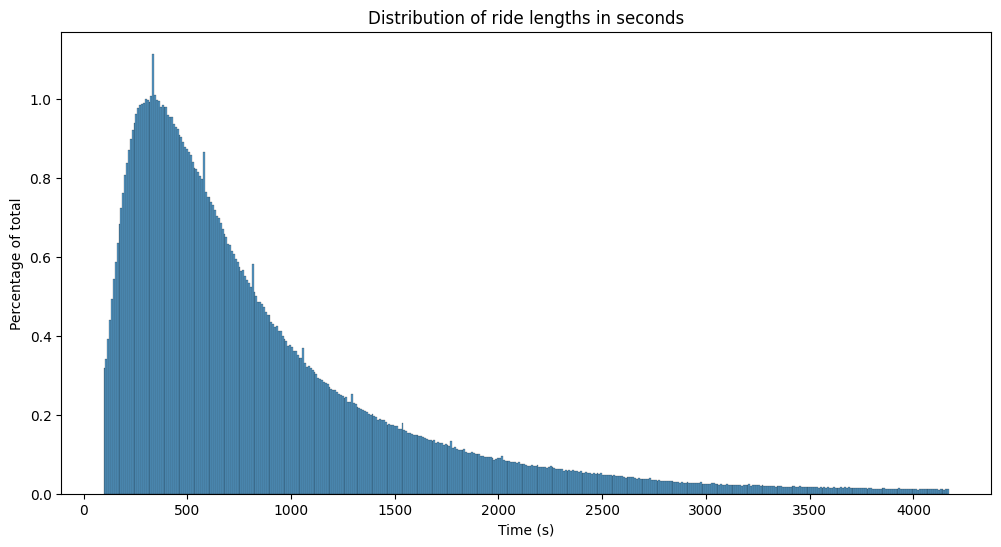

In [16]:
print('skewness of filtered data:', skew(df['total_seconds']))
plt.figure(figsize = (12, 6))
sns.histplot(df['total_seconds'], stat = 'percent')
plt.xlabel('Time (s)')
plt.ylabel('Percentage of total')
plt.title('Distribution of ride lengths in seconds')
plt.show() # Although there is a slight right skew in our data it has improved drastically after removing outliers 

In [17]:
df = df.reset_index(drop = True)
print(df)

                  ride_id  rideable_type          started_at  \
0        C2F7DD78E82EC875  electric_bike 2022-01-13 11:59:47   
1        A6CF8980A652D272  electric_bike 2022-01-10 08:41:56   
2        BD0F91DFF741C66D   classic_bike 2022-01-25 04:53:40   
3        CBB80ED419105406   classic_bike 2022-01-04 00:18:04   
4        DDC963BFDDA51EEA   classic_bike 2022-01-20 01:31:10   
...                   ...            ...                 ...   
4151225  43ABEE85B6E15DCA   classic_bike 2022-12-05 06:51:04   
4151226  F041C89A3D1F0270  electric_bike 2022-12-14 17:06:28   
4151227  A2BECB88430BE156   classic_bike 2022-12-08 16:27:47   
4151228  37B392960E566F58   classic_bike 2022-12-28 09:37:38   
4151229  2DD1587210BA45AE   classic_bike 2022-12-09 00:27:25   

                   ended_at             start_station_name start_station_id  \
0       2022-01-13 12:02:44       Glenwood Ave & Touhy Ave              525   
1       2022-01-10 08:46:17       Glenwood Ave & Touhy Ave              5

In [18]:
'''
Data Analysis

Keeping in mind the stakeholders questions, how can we better visualise the perks of being a member with informatics
Guiding questions for the dashboard:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

'''

'\nData Analysis\n\nKeeping in mind the stakeholders questions, how can we better visualise the perks of being a member with informatics\nGuiding questions for the dashboard:\n1. How do annual members and casual riders use Cyclistic bikes differently?\n2. Why would casual riders buy Cyclistic annual memberships?\n3. How can Cyclistic use digital media to influence casual riders to become members?\n\n'

In [20]:
'''
Q1. How do annual members and casual riders use Cyclistic bikes differently?
Q2. Why would casual riders buy Cyclistic annual memberships?

For question 1 & 2, once we know how, we would also know the why because that's precisely the reason why members purchase annual memberships. 
We first take a quick look at the data and find the percentage of members vs casual riders. 
Next, after finding the proportions we can narrow down this question by asking on which days do they travel, as it can determine the purpose of travel. 
Additionally, we could ask if there are differences in the ride length of members vs casual riders. 
We begin answering the questions with the above prompts and generate more findings as we gain insight from the data.

'''

"\nQ1. How do annual members and casual riders use Cyclistic bikes differently?\nQ2. Why would casual riders buy Cyclistic annual memberships?\n\nFor question 1 & 2, once we know how, we would also know the why because that's precisely the reason why members purchase annual memberships. \nWe first take a quick look at the data and find the percentage of members vs casual riders. \nNext, after finding the proportions we can narrow down this question by asking on which days do they travel, as it can determine the purpose of travel. \nAdditionally, we could ask if there are differences in the ride length of members vs casual riders. \nWe begin answering the questions with the above prompts and generate more findings as we gain insight from the data.\n\n"

In [21]:
# Percent of members vs casual riders
member_percent = df.groupby('member_casual')['member_casual'].count()*100/len(df)
member_percent = member_percent.reset_index(name = 'percent').rename(columns = {'member_casual' : 'member'})
member_percent['percent'] = member_percent['percent'].round(2)
member_percent[['member', 'percent']]

,member,percent
0,member,60.91
1,casual,39.09


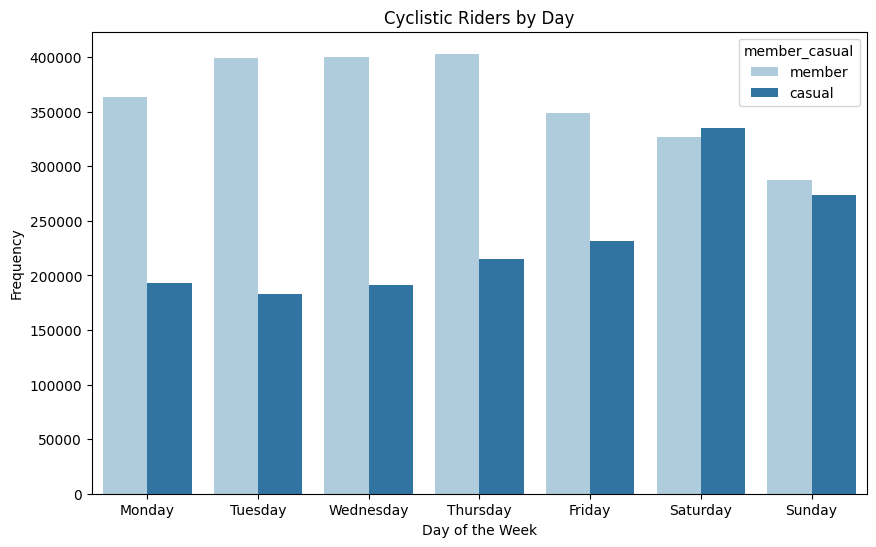

In [22]:
# Frequency of riders based on day of travel
ride_day = df.groupby(['day', 'member_casual'])['member_casual'].count().reset_index(name = 'count')

plt.figure(figsize = (10,6))
sns.barplot(data = ride_day, x = 'day', y = 'count', hue = 'member_casual', palette = 'Paired', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Frequency')
plt.xlabel('Day of the Week')
plt.title('Cyclistic Riders by Day')
plt.show() # Based on the days travelled, saturday and sundays are more popular for causal riders while member riders preferred weekday travels

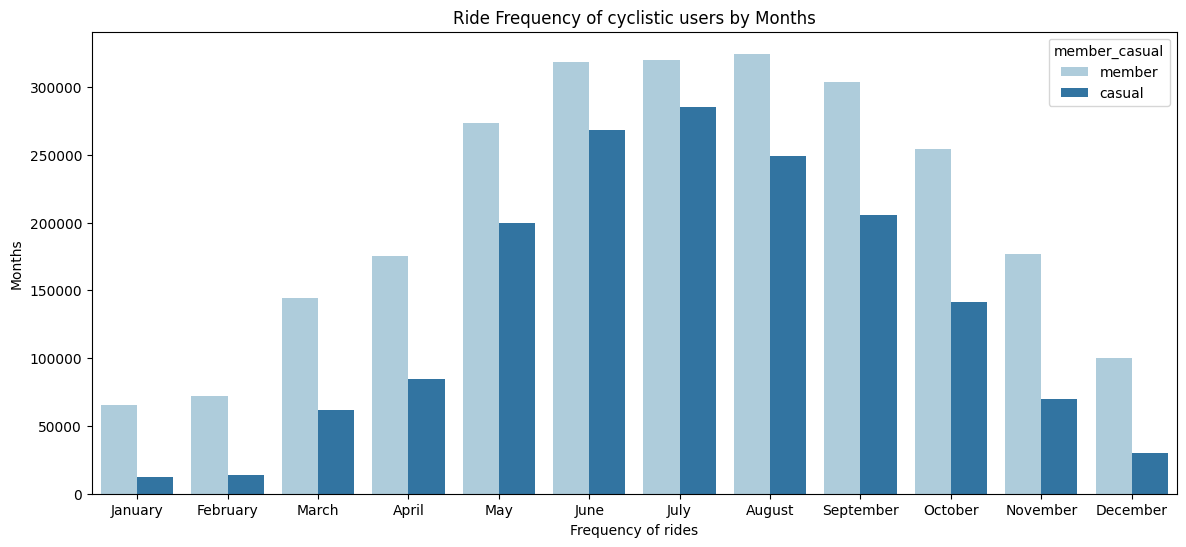

In [23]:
# Frequency of rides and ride times by the month 
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['started_at'].dt.month_name()
df['month'] = pd.Categorical(df['month'], categories = month, ordered = True)

member_ride_month = df.groupby(['month', 'member_casual'])['member_casual'].count().reset_index(name = 'count')
member_ride_month = member_ride_month.sort_values(by = 'month')

plt.figure(figsize = (14, 6))
sns.barplot(data = member_ride_month, x = 'month', y = 'count', hue = 'member_casual', palette = 'Paired')
plt.xlabel('Frequency of rides')
plt.ylabel('Months')
plt.title('Ride Frequency of cyclistic users by Months')
plt.show() # Popular months are between May and September/October, not much difference between member vs casual riders

In [24]:
# Average ride time by member category
avg_ride = df.groupby('member_casual')['total_seconds'].mean().reset_index(name = 'average_ride')
avg_ride['average_ride'] = pd.to_datetime(avg_ride['average_ride'], unit = 's').dt.strftime('%H:%M:%S')
avg_ride[['member_casual', 'average_ride']] # Average ride time for members vs casual has a significant difference, which could be linked to the day they travel

,member_casual,average_ride
0,member,00:12:07
1,casual,00:17:45


In [25]:
# average ride by members and rideable_type
ride_type_avg = df.groupby(['member_casual', 'rideable_type'])['total_seconds'].mean().reset_index(name = 'avg_ride')
ride_type_avg['avg_ride'] = pd.to_datetime(ride_type_avg['avg_ride'], unit = 's').dt.strftime('%H:%M:%S')
print(ride_type_avg) # Additionally members tend not to use docked bikes which have a much longer average ride time compared to other transport means

  member_casual  rideable_type  avg_ride
0        member   classic_bike  00:12:44
1        member    docked_bike       NaN
2        member  electric_bike  00:10:55
3        casual   classic_bike  00:18:19
4        casual    docked_bike  00:26:34
5        casual  electric_bike  00:15:11


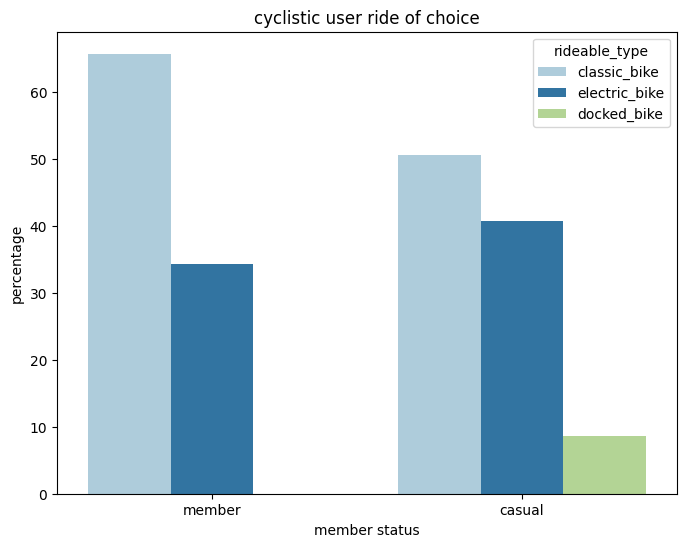

In [26]:
# Discovering other variables that contribute to a longer average ride for casual users; percent of riders by rideable_type
member_ride_type = df.groupby(['member_casual', 'rideable_type'])['rideable_type'].count().reset_index(name = 'count')
member_ride_type['total'] = member_ride_type.groupby('member_casual')['count'].transform('sum')
member_ride_type['percent'] = (member_ride_type['count']*100/member_ride_type['total']).round(2)

plt.figure(figsize = (8, 6))
sns.barplot(data = member_ride_type, x = 'member_casual', y = 'percent', hue = 'rideable_type', palette= 'Paired', order = ['member', 'casual'], hue_order = ['classic_bike' , 'electric_bike', 'docked_bike'])
plt.xlabel('member status')
plt.ylabel('percentage')
plt.title('cyclistic user ride of choice')
plt.show() # members mainly use classic and electric bikes while docked bikes are more common for casual riders; as docked systems are harder to implement within the city, the locations of docked areas are more targeted

In [27]:
''' 
Summary
How can we convert our casual riders to members of cyclistic? Questions to answer:
Q1. How do annual members and casual riders use Cyclistic bikes differently?
Q2. Why would casual riders buy Cyclistic annual memberships?
Q3. How can Cyclistic use digital media to influence casual riders to become members?

Trends
- Casual riders use cyclistic more for leisurely activities and primarily on weekends
- Peak months for travel are May to September
- Although there is a large selection of bikes, casual riders still do use docked bikes; possibly due to the location of the bikes i.e. parks where there is a determined start and end point

Solution
- Knowing the purpose of travel allows us to be more strategic with our marketing, i.e. launch more campaigns over the weekend to cater to casual riders as well
- More specifically, we can target months form May to September where we see more demand for our service. Unsurprisingly these months coincide with spring, summer and autumn, the warmer months to ride bikes
- Although there is some demand for docked bikes, we can see trends moving towards classic or even electric bikes. Indicating that convenience is still a primary consideration to look out for.
'''

' \nSummary\nHow can we convert our casual riders to members of cyclistic? Questions to answer:\nQ1. How do annual members and casual riders use Cyclistic bikes differently?\nQ2. Why would casual riders buy Cyclistic annual memberships?\nQ3. How can Cyclistic use digital media to influence casual riders to become members?\n\nTrends\n- Casual riders use cyclistic more for leisurely activities and primarily on weekends\n- Peak months for travel are May to September\n- Although there is a large selection of bikes, casual riders do have a preference for docked bikes; possibly due to the location of the bikes i.e. parks where there is a determine start and end point\n\nSolution\n- Knowing the purpose of travel allows us to be more strategic with our marketing, i.e. launch more campaigns over the weekend to cater to casual riders as well\n- More specifically, we can target months form May to September where we see more demand for our service. Unsurprisingly these months coincide with spring,

In [28]:
tab = df.drop(columns = ['ride_length', 'start_station_id', 'end_station_id', 'month', 'day']) # drop ride_length as we have already converted all time into seconds
tab = tab.reset_index(drop = True)

# Export file to build dashboard
path = r'C:/Users/Chris/OneDrive/Desktop/Python Projects/cyclistic data'
tab.to_csv(path + '//cyclistic_tab.csv')